In [126]:
#Importar librerias necesarias para lectura y procesamiento de datos
import pandas as pd
import geopandas as gpd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [98]:
#Leer los archivos parquet
dftrain=pd.read_parquet('../proyecto_ML/train.parquet')
dftest=pd.read_parquet('../proyecto_ML/test.parquet')

In [99]:
#Verificar la correcta importacion de dftrain y brindar un primer panorama de sus columnas
dftrain.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,...,0,0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn


In [100]:
#Verificar la correcta importacion de dftest y brindar un primer panorama de sus columnas
dftest.head()

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7037609789,https://annarbor.craigslist.org/apa/d/wixom-ho...,ann arbor,https://annarbor.craigslist.org,manufactured,1344,3,2.0,0,0,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00M0M_iNczP1nzIL...,"OPEN HOUSE TODAY! APPLY THIS WEEK, PUT A HOLDI...",42.5333,-83.5763,mi
1,7032406876,https://vermont.craigslist.org/apa/d/randolph-...,vermont,https://vermont.craigslist.org,apartment,1050,2,1.0,0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00L0L_ecirmYBIzL...,"Think of it, you'll be first to get your mail....",43.9393,-72.5538,vt
2,7037022682,https://annarbor.craigslist.org/apa/d/ann-arbo...,ann arbor,https://annarbor.craigslist.org,apartment,1150,2,2.0,1,1,...,1,0,0,w/d in unit,carport,https://images.craigslist.org/00e0e_dPln2xjo9g...,One of Ann Arbor's most luxurious apartment co...,42.2492,-83.7712,mi
3,7048681802,https://fortcollins.craigslist.org/apa/d/fort-...,fort collins / north CO,https://fortcollins.craigslist.org,apartment,1280,2,2.5,1,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00L0L_jlektT5cSd...,"Specials! Move in before January 16th, 2020 an...",40.5501,-105.0350,co
4,7043597870,https://charlottesville.craigslist.org/apa/d/c...,charlottesville,https://charlottesville.craigslist.org,apartment,783,2,1.0,1,1,...,0,0,0,laundry on site,None,https://images.craigslist.org/00D0D_cXa4KbZ6ox...,Barracks West Apartments & Townhomes in Charlo...,38.0936,-78.5611,va


In [102]:
#Revisar informacion general del DataFrame
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   price                    346479 non-null  int64  
 5   type                     346479 non-null  object 
 6   sqfeet                   346479 non-null  int64  
 7   beds                     346479 non-null  int64  
 8   baths                    346479 non-null  float64
 9   cats_allowed             346479 non-null  int64  
 10  dogs_allowed             346479 non-null  int64  
 11  smoking_allowed          346479 non-null  int64  
 12  wheelchair_access        346479 non-null  int64  
 13  electric_vehicle_charge  346479 non-null  int64  
 14  come

In [103]:
#Eliminar comlumnas que no son relevantes para el estudio
dftrain=dftrain.drop(['id','url','region_url','image_url','description'], axis=1)

In [105]:
#Revisar a mayor detalle los valores nulos
dftrain.isna().sum()

region                          0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             71171
parking_options            126682
lat                          1722
long                         1722
state                           0
dtype: int64

In [106]:
#Eliminar valores nulos en la columna long y lat
dftrain = dftrain[dftrain.long.isna() == False]
dftrain = dftrain[dftrain.lat.isna() == False]
len(dftrain)

344757

In [107]:
#Reemplazar los valores nulos de laundry_options y parking_options
#por valores que indican ausencia de esta caracteristica
dftrain.loc[dftrain.laundry_options.isna()==True,'laundry_options']='no laundry on site'
dftrain.loc[dftrain.parking_options.isna()==True,'parking_options']='no parking'

In [108]:
#Revisar los valores de las columnas modificadas
dftrain.laundry_options.value_counts()

w/d in unit           117798
no laundry on site     74153
w/d hookups            67543
laundry on site        52849
laundry in bldg        32414
Name: laundry_options, dtype: int64

In [109]:
#Revisar los valores de las columnas modificadas
dftrain.parking_options.value_counts()

no parking            128743
off-street parking    115361
attached garage        35985
carport                34972
detached garage        15233
street parking         14333
valet parking            130
Name: parking_options, dtype: int64

<AxesSubplot: xlabel='long', ylabel='lat'>

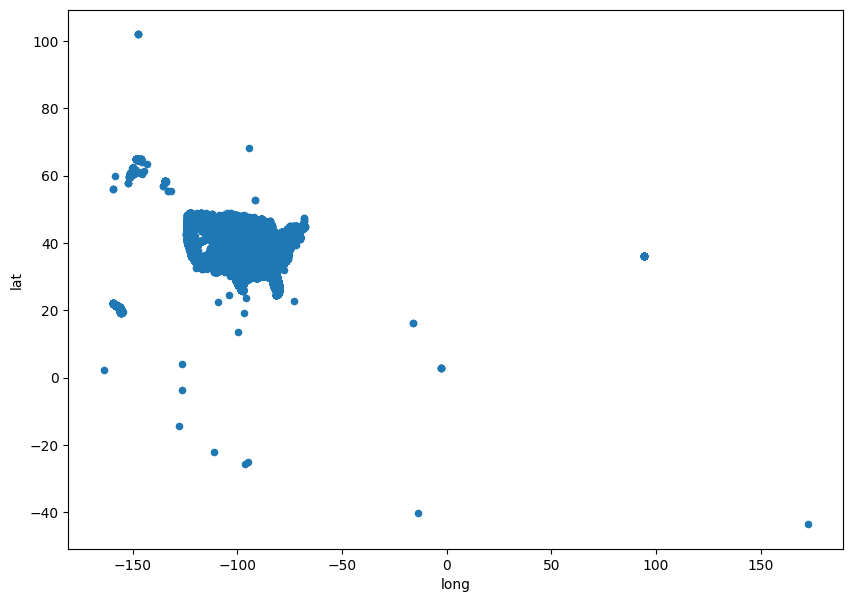

In [110]:
#Visualizar un panorama de ubicacion mediante las coordenadas del DataFrame
dftrain.plot(kind='scatter', x='long', y='lat', figsize=(10,7))

In [111]:
#Verificar la correlacion entre variables
dftrain.corr()

C:\Users\Asus\AppData\Local\Temp\ipykernel_16628\533448645.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dftrain.corr()


,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
price,1.000000,0.000008,0.000071,0.000160,0.001028,0.001046,0.001026,-0.000425,-0.000187,-0.000373,-0.001486,0.000810
sqfeet,0.000008,1.000000,0.004005,0.010575,-0.003769,-0.002765,-0.002165,-0.001228,-0.000147,0.001184,0.007120,-0.003083
beds,0.000071,0.004005,1.000000,0.379153,-0.023919,-0.013692,-0.001988,-0.012188,-0.005165,0.002791,0.008823,0.008232
baths,0.000160,0.010575,0.379153,1.000000,-0.020111,0.018065,-0.015325,0.019837,0.008657,0.039389,-0.080293,-0.005556
cats_allowed,0.001028,-0.003769,-0.023919,-0.020111,1.000000,0.887890,0.016238,0.122164,0.049231,-0.058808,-0.016043,0.033745
dogs_allowed,0.001046,-0.002765,-0.013692,0.018065,0.887890,1.000000,0.012881,0.128958,0.049158,-0.037334,-0.056580,0.018896
smoking_allowed,0.001026,-0.002165,-0.001988,-0.015325,0.016238,0.012881,1.000000,-0.224919,-0.096781,-0.160197,-0.177118,0.163744
wheelchair_access,-0.000425,-0.001228,-0.012188,0.019837,0.122164,0.128958,-0.224919,1.000000,0.192022,0.196768,0.002498,-0.025412
electric_vehicle_charge,-0.000187,-0.000147,-0.005165,0.008657,0.049231,0.049158,-0.096781,0.192022,1.000000,0.068812,0.025800,-0.061036
comes_furnished,-0.000373,0.001184,0.002791,0.039389,-0.058808,-0.037334,-0.160197,0.196768,0.068812,1.000000,0.004546,-0.027368


In [112]:
#Procesamiento de las variables categóricas en el dataFrame generando variables dummies
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344757 entries, 0 to 346478
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region                   344757 non-null  object 
 1   price                    344757 non-null  int64  
 2   type                     344757 non-null  object 
 3   sqfeet                   344757 non-null  int64  
 4   beds                     344757 non-null  int64  
 5   baths                    344757 non-null  float64
 6   cats_allowed             344757 non-null  int64  
 7   dogs_allowed             344757 non-null  int64  
 8   smoking_allowed          344757 non-null  int64  
 9   wheelchair_access        344757 non-null  int64  
 10  electric_vehicle_charge  344757 non-null  int64  
 11  comes_furnished          344757 non-null  int64  
 12  laundry_options          344757 non-null  object 
 13  parking_options          344757 non-null  object 
 14  lat 

In [113]:
#Codificación de las sisguientes variables categóricas region,type, laundry_options, parking_options
#Por label_encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dftrain['region'] = label_encoder.fit_transform(dftrain['region'])
dftrain['type'] = label_encoder.fit_transform(dftrain['type'])
dftrain['laundry_options'] = label_encoder.fit_transform(dftrain['laundry_options'])
dftrain['parking_options'] = label_encoder.fit_transform(dftrain['parking_options'])
dftrain['state'] = label_encoder.fit_transform(dftrain['state'])
dftrain

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,33,1350,6,1200,2,2.0,1,1,1,0,0,0,4,2,43.5851,-116.2250,13
1,64,1115,0,694,1,1.0,1,1,1,0,0,0,4,1,38.9137,-104.7800,5
2,236,1129,0,900,2,2.0,0,0,1,0,0,0,3,4,36.7922,-76.1643,45
3,269,1580,6,1469,3,2.0,1,1,1,0,0,0,4,3,33.5623,-112.0560,3
4,230,995,0,700,1,1.0,1,1,1,0,0,0,4,1,36.0595,-86.6592,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346474,101,672,0,660,1,1.0,1,1,1,0,0,0,1,3,37.9591,-87.5293,15
346475,301,2122,0,1099,2,2.0,1,1,1,0,0,0,4,4,32.6279,-117.0370,4
346476,65,1014,0,1104,2,2.0,1,1,0,0,0,0,3,4,33.9659,-80.9355,40
346477,238,935,0,1050,2,2.0,0,0,0,0,0,0,4,2,48.1995,-101.2800,28


In [114]:
#Crear una columna asignando una categoria segun el precio
dftrain.loc[dftrain.price<1000,'category_price']=1
dftrain.loc[dftrain.price>=1000,'category_price']=0
dftrain

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state,category_price
0,33,1350,6,1200,2,2.0,1,1,1,0,0,0,4,2,43.5851,-116.2250,13,0.0
1,64,1115,0,694,1,1.0,1,1,1,0,0,0,4,1,38.9137,-104.7800,5,0.0
2,236,1129,0,900,2,2.0,0,0,1,0,0,0,3,4,36.7922,-76.1643,45,0.0
3,269,1580,6,1469,3,2.0,1,1,1,0,0,0,4,3,33.5623,-112.0560,3,0.0
4,230,995,0,700,1,1.0,1,1,1,0,0,0,4,1,36.0595,-86.6592,42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346474,101,672,0,660,1,1.0,1,1,1,0,0,0,1,3,37.9591,-87.5293,15,1.0
346475,301,2122,0,1099,2,2.0,1,1,1,0,0,0,4,4,32.6279,-117.0370,4,0.0
346476,65,1014,0,1104,2,2.0,1,1,0,0,0,0,3,4,33.9659,-80.9355,40,0.0
346477,238,935,0,1050,2,2.0,0,0,0,0,0,0,4,2,48.1995,-101.2800,28,1.0


In [115]:
#Revisar los valores que contiene la nueva columna creada
dftrain.category_price.value_counts()

0.0    184773
1.0    159984
Name: category_price, dtype: int64

In [118]:
#Revisar las columnas del DataFrame
dftrain.columns

Index(['region', 'price', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'lat', 'long', 'state', 'category_price'],
      dtype='object')

In [150]:
#Importar las librerias necesarias para crear los modelos de machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [133]:
#Asignar las variables necesarias para el entrenamiento
X = dftrain[['region', 'price', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'state']]
y = dftrain['category_price']

In [137]:
#Dividir para el respectivo entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [148]:
# Crear un objeto Decision Tree classifer
clf = DecisionTreeClassifier(max_depth=1)

# Entrenar Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predecir la respuesta del test dataset
y_pred = clf.predict(X_test)

In [149]:
# Comprobar los resultados obtenidos en el modelo con los de testeo mediante una metrica
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


Se logro indentificar que es un resultado no aceptable, ya que muestra una señal clara de overffiting. Asi que, se procedio a evaluar el modelo con distintos valores de profundidad

In [134]:
#Creacion de listas vacias que iran almacenados los resultados obtenidos en los modelos
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,20,1)
i = 0
i_max = len(profundidades)
for profundidad in profundidades:
    i = i + 1
    clf = DecisionTreeClassifier(max_depth=profundidad)
    tree_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

Completado: 100.0%


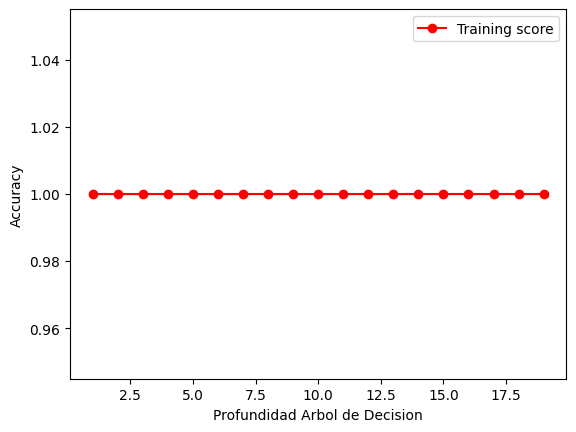

In [135]:
#Visualizacion de los resultados obtenidos
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

Se logra observar que los resultados no han variado en ninguna forma, siguen manteniendo el Accuracy no importa la profundidad del modelo.
Asi que, se concluyo buscar otro modelo que nos ayude ya que el anterior no nos ayudó

In [151]:
#Se empieza hacer la misma evaluacion pero con el modelo de K-Neighbors
knn_train_scores_mean = []
knn_train_scores_std = []
knn_test_scores_mean = []
knn_test_scores_std = []

n_vecinos = np.arange(1,20,1)
i = 0
i_max = len(n_vecinos)
for vecinos in n_vecinos:
    i = i + 1
    clf = KNeighborsClassifier(n_neighbors=vecinos)
    knn_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    knn_train_scores_mean.append(knn_scores['train_score'].mean())
    knn_train_scores_std.append(knn_scores['train_score'].std())
    
    knn_test_scores_mean.append(knn_scores['test_score'].mean())
    knn_test_scores_std.append(knn_scores['test_score'].std())
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

knn_train_scores_mean = np.array(knn_train_scores_mean)
knn_train_scores_std = np.array(knn_train_scores_std)
knn_test_scores_mean = np.array(knn_test_scores_mean)
knn_test_scores_std = np.array(knn_test_scores_std)

Completado: 100.0%


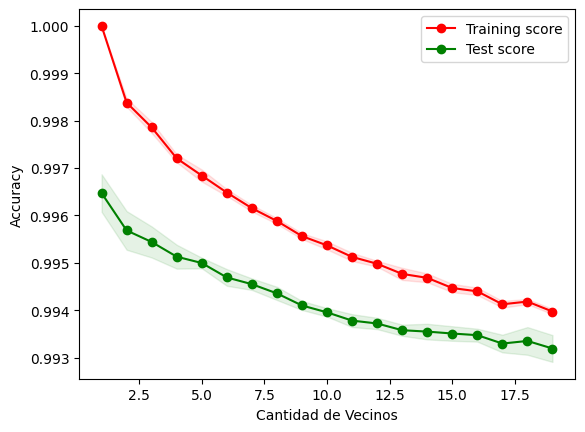

In [152]:
#Se visualizan los resultados obtenidos con la anterior evaluacion
plt.fill_between(n_vecinos, knn_train_scores_mean - knn_train_scores_std,
                 knn_train_scores_mean + knn_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(n_vecinos, knn_test_scores_mean - knn_test_scores_std,
                 knn_test_scores_mean + knn_test_scores_std, alpha=0.1, color="g")

plt.plot(n_vecinos, knn_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(n_vecinos, knn_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Cantidad de Vecinos')
plt.show()

Con este grafico se concluyó que la mejor sincronia sucede cuando se realiza con el hiperparametro de n_neighbors=1

In [155]:
#Muestra de los resultados del grafico en forma numerica
print(knn_train_scores_mean)
#print(knn_train_scores_std)
print(knn_test_scores_mean)
#print(knn_test_scores_std)

print(knn_train_scores_mean-knn_test_scores_mean)

[1.         0.99838147 0.99785791 0.99720455 0.99684198 0.99648303
 0.99615309 0.99588261 0.99556354 0.99536848 0.99512483 0.99498052
 0.9947666  0.99468321 0.99446857 0.99439895 0.99412557 0.99418286
 0.99397257]
[0.99647288 0.99568392 0.99544027 0.9951299  0.99499648 0.99469191
 0.99454978 0.99435544 0.99410019 0.99395516 0.99378113 0.99372021
 0.99357809 0.99354908 0.99350847 0.99347366 0.99329673 0.99335184
 0.99319231]
[0.00352712 0.00269755 0.00241765 0.00207465 0.0018455  0.00179112
 0.0016033  0.00152716 0.00146335 0.00141331 0.0013437  0.00126031
 0.00118852 0.00113413 0.0009601  0.00092529 0.00082884 0.00083102
 0.00078026]


In [186]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [170]:
#Verificar el tamaño del split
print([X_train.shape, X_test.shape, y_train.shape, y_test.shape])

[(241329, 15), (103428, 15), (241329,), (103428,)]


In [187]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=1)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [188]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9961035696329814


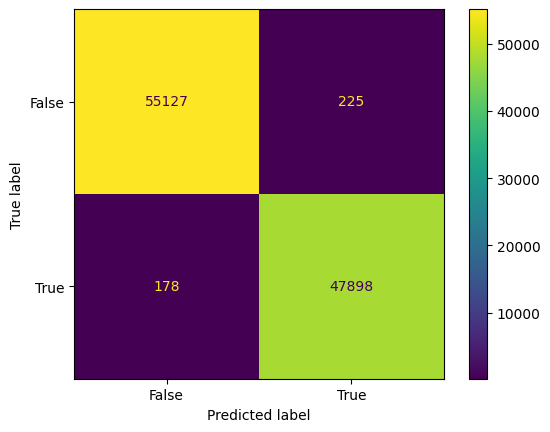

In [189]:
#Vizualicion de la matriz de confusion de forma grafica
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Procesamiento del dataset de testeo para su posterior aplicacion en el modelo entrenado

In [171]:
#Revisar informacion general del DataFrame
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38498 entries, 0 to 38497
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38498 non-null  int64  
 1   url                      38498 non-null  object 
 2   region                   38498 non-null  object 
 3   region_url               38498 non-null  object 
 4   type                     38498 non-null  object 
 5   sqfeet                   38498 non-null  int64  
 6   beds                     38498 non-null  int64  
 7   baths                    38498 non-null  float64
 8   cats_allowed             38498 non-null  int64  
 9   dogs_allowed             38498 non-null  int64  
 10  smoking_allowed          38498 non-null  int64  
 11  wheelchair_access        38498 non-null  int64  
 12  electric_vehicle_charge  38498 non-null  int64  
 13  comes_furnished          38498 non-null  int64  
 14  laundry_options       

In [176]:
#Revisar a mayor detalle los valores nulos
dftest.isna().sum()

id                           0
url                          0
region                       0
region_url                   0
type                         0
sqfeet                       0
beds                         0
baths                        0
cats_allowed                 0
dogs_allowed                 0
smoking_allowed              0
wheelchair_access            0
electric_vehicle_charge      0
comes_furnished              0
laundry_options              0
parking_options              0
image_url                    0
description                  0
lat                        196
long                       196
state                        0
dtype: int64

Debemos realizar el mismo tratamiento que en el dataset de entrenamiento

In [175]:
#Reemplazar los valores nulos de laundry_options y parking_options
#por valores que indican ausencia de esta caracteristica
dftest.loc[dftest.laundry_options.isna()==True,'laundry_options']='no laundry on site'
dftest.loc[dftest.parking_options.isna()==True,'parking_options']='no parking'

In [177]:
#Codificación de las sisguientes variables categóricas region,type, laundry_options, parking_options
#Por label_encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dftest['region'] = label_encoder.fit_transform(dftest['region'])
dftest['type'] = label_encoder.fit_transform(dftest['type'])
dftest['laundry_options'] = label_encoder.fit_transform(dftest['laundry_options'])
dftest['parking_options'] = label_encoder.fit_transform(dftest['parking_options'])
dftest['state'] = label_encoder.fit_transform(dftest['state'])
dftest

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7037609789,https://annarbor.craigslist.org/apa/d/wixom-ho...,9,https://annarbor.craigslist.org,8,1344,3,2.0,0,0,...,0,0,0,4,4,https://images.craigslist.org/00M0M_iNczP1nzIL...,"OPEN HOUSE TODAY! APPLY THIS WEEK, PUT A HOLDI...",42.5333,-83.5763,22
1,7032406876,https://vermont.craigslist.org/apa/d/randolph-...,370,https://vermont.craigslist.org,0,1050,2,1.0,0,0,...,0,0,0,3,4,https://images.craigslist.org/00L0L_ecirmYBIzL...,"Think of it, you'll be first to get your mail....",43.9393,-72.5538,46
2,7037022682,https://annarbor.craigslist.org/apa/d/ann-arbo...,9,https://annarbor.craigslist.org,0,1150,2,2.0,1,1,...,1,0,0,4,1,https://images.craigslist.org/00e0e_dPln2xjo9g...,One of Ann Arbor's most luxurious apartment co...,42.2492,-83.7712,22
3,7048681802,https://fortcollins.craigslist.org/apa/d/fort-...,112,https://fortcollins.craigslist.org,0,1280,2,2.5,1,1,...,0,0,0,4,0,https://images.craigslist.org/00L0L_jlektT5cSd...,"Specials! Move in before January 16th, 2020 an...",40.5501,-105.0350,5
4,7043597870,https://charlottesville.craigslist.org/apa/d/c...,53,https://charlottesville.craigslist.org,0,783,2,1.0,1,1,...,0,0,0,1,3,https://images.craigslist.org/00D0D_cXa4KbZ6ox...,Barracks West Apartments & Townhomes in Charlo...,38.0936,-78.5611,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38493,7041556338,https://mobile.craigslist.org/apa/d/daphne-lux...,217,https://mobile.craigslist.org,0,1180,2,2.0,1,1,...,1,0,0,4,2,https://images.craigslist.org/01616_lCR9AY6Vlb...,At Belforest Villas youâll have all the conv...,30.6197,-87.8895,1
38494,7051072582,https://elpaso.craigslist.org/apa/d/el-paso-th...,96,https://elpaso.craigslist.org,0,1138,3,2.0,1,1,...,0,0,0,3,4,https://images.craigslist.org/01010_fEVpb2QLmX...,Ready for the CrossPointe Experience show con...,31.8045,-105.9660,43
38495,7048966175,https://tampa.craigslist.org/hil/apa/d/brandon...,350,https://tampa.craigslist.org,0,743,1,1.0,1,1,...,0,0,0,4,4,https://images.craigslist.org/00r0r_b7LZqSM75f...,To schedule a tour We now book our tour appoin...,27.8971,-82.3387,9
38496,7044693740,https://mohave.craigslist.org/apa/d/fort-mohav...,219,https://mohave.craigslist.org,5,1276,3,2.0,0,0,...,0,0,0,3,0,https://images.craigslist.org/00606_21aHFx5Gtq...,"House for Rent (1 year lease - min. ) - 3 Bed,...",35.0052,-114.5690,3


In [178]:
#Eliminar columnas no necesarias para aplicar en el modelo
dftest=dftest.drop(['id','url','region_url','image_url','description'], axis=1)
dftest

,region,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,9,8,1344,3,2.0,0,0,1,0,0,0,4,4,42.5333,-83.5763,22
1,370,0,1050,2,1.0,0,0,1,0,0,0,3,4,43.9393,-72.5538,46
2,9,0,1150,2,2.0,1,1,1,1,0,0,4,1,42.2492,-83.7712,22
3,112,0,1280,2,2.5,1,1,0,0,0,0,4,0,40.5501,-105.0350,5
4,53,0,783,2,1.0,1,1,1,0,0,0,1,3,38.0936,-78.5611,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38493,217,0,1180,2,2.0,1,1,0,1,0,0,4,2,30.6197,-87.8895,1
38494,96,0,1138,3,2.0,1,1,1,0,0,0,3,4,31.8045,-105.9660,43
38495,350,0,743,1,1.0,1,1,1,0,0,0,4,4,27.8971,-82.3387,9
38496,219,5,1276,3,2.0,0,0,0,0,0,0,3,0,35.0052,-114.5690,3


In [192]:
#Se determina la variable a aplicar en el modelo entrenado de tal forma que sea similar 
# al que presentabamos en el entrenamiento 
X1 = dftrain[['region', 'price', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'state']]

In [193]:
#Aplicar el modelo entrenado en el dataset de testeo
pred = knn.predict(X1)

In [194]:
#Crear un DataFrame con los resultados obtenidos en la prediccion
dfp=pd.DataFrame(pred)
dfp.rename(columns = {0:'pred'}, inplace = True)
dfp.pred.value_counts()

0.0    184726
1.0    160031
Name: pred, dtype: int64

In [184]:
#Exportar los resultados obtenidos en la prediccion
dfp.to_csv('JcEC13.csv',index=False)